# Project Name: Predicting House Prices





# Project Overview
This [Project](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) is all about predicting house prices. House is where people live, work, relax. Not only real a state agent but also house's buyer care about. This is a supervised learning regression problem. The Ames Housing [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) was compiled by Dean De Cock for use in data science education. It contains a test set, trainset each one has 1460 observations and 80 features exclude "id". I'm going to build several regression models that are able to predict house prices so that house buyers will know how much money they should spend to get their dreamy house. This project was built on python 3.6.7 with google colab. Some images may not able to display correctly if running on a local machine environment.

This was ranked top 13% on 9 March 2021.


![](img/top13.png)
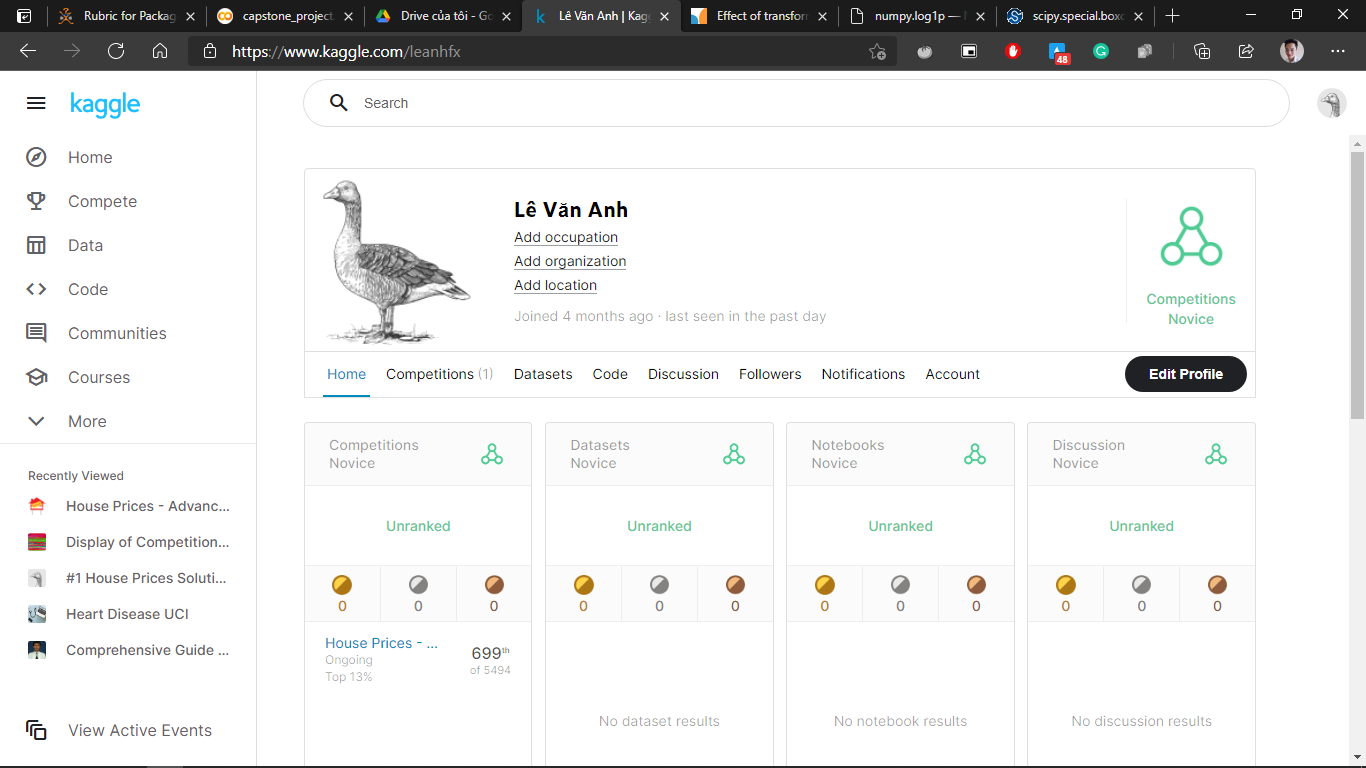



Some trained models were saved in a folder named "model" which might be combined like the "predict" function at the end of this notebook to make the final prediction result.

# Problem statement

The goal is to minimize the prediction error as small as possible.

In this project, I will do the following steps:
- Do some data analysis.
- Drop some bad features variable.
- Imputing missing categorical features with None and 0 for numerical features.
- [Boxcox1p](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox1p.html?highlight=boxcox1p#scipy.special.boxcox1p) transform for highly skew features and [log1p](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html?highlight=log1p#numpy.log1p) for the target output ([more accurate](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html)).
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html?highlight=ordinalencoder#sklearn.preprocessing.OrdinalEncoder) (this is for more than one feature often used for input data. In contrast, LabelEncoder is used for output target) some categorical features and getting dummies for the other.
- Use [featuretools](https://featuretools.alteryx.com/en/stable/guides/guides_index.html) to generate more features.

Training and cross-validation some models that I'm going to 
mention below with 70 percent data and make predictions on the rest set to tune models then combine them to get the final model. Before predicting on the test set to submit to Kaggle, I will fit all these models with full data which makes the prediction more accurate.

- I will use some sklearn models such as [Ridge](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification), [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso), [Elasticnet](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net), [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html), [LGBMRegressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html), [XGBoostRegressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) and combine them with  [StackingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html) then at the end fit them all with weighted models based on their cross-validation score. Some of their model data need to be transformed by [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler).



## Some explaination

First of all, as you know





# Data Understanding



## Import some libraries

In [ ]:
# !sudo apt update
!pip -q install featuretools

In [ ]:
import numpy as np # linear algebra
import pandas as pd # manipulate data
from datetime import datetime as dt
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for some statistics
import scipy.stats as stats
from scipy.special import boxcox1p# transform skew features
from scipy.stats import norm, skew 

import featuretools as ft
from sklearn.preprocessing import OrdinalEncoder # for encoding ordinal data
from sklearn.preprocessing import StandardScaler # for scaling data
from sklearn.model_selection import train_test_split # split data
from sklearn.model_selection import GridSearchCV # for getting best params

from sklearn.pipeline import make_pipeline # making life easier
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score # cross-validation model
from sklearn.metrics import mean_squared_error # calculating error
import warnings
def ignore_warn(*args, **kargs):
    pass 
warnings.warn = ignore_warn


## Load data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/funix/machine-learning/asmnt/MLP305/MLP305x_Full_Project_anhlvse00534x@funix.edu.vn/Capstone project/data/train.csv')
test = pd.read_csv('/content/drive/My Drive/funix/machine-learning/asmnt/MLP305/MLP305x_Full_Project_anhlvse00534x@funix.edu.vn/Capstone project/data/test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
for col in sorted(train.columns):
    print(train[col].value_counts())

864     25
1040    16
912     14
848     12
894     12
        ..
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64
0       829
728      10
504       9
672       8
546       8
       ... 
788       1
1116      1
1112      1
1111      1
1872      1
Name: 2ndFlrSF, Length: 417, dtype: int64
0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dty

We can see that Utilities and Street feature have only 2 values but one have small amount. Another one is PoolQC which is missing a alot values so these features will be ignored 

33 features have missing values

TotalBsmtSF      0.068540
GarageArea       0.068540
GarageCars       0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
SaleType         0.068540
Exterior1st      0.068540
Exterior2nd      0.068540
Functional       0.137080
Utilities        0.137080
BsmtHalfBath     0.137080
BsmtFullBath     0.137080
MSZoning         0.274160
MasVnrArea       1.028101
MasVnrType       1.096642
BsmtFinType2     2.878684
BsmtFinType1     2.878684
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtCond         3.084304
GarageType       5.209047
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
GarageYrBlt      5.346127
LotFrontage     15.558602
FireplaceQu     50.034270
Fence           80.123372
Alley           92.666210
MiscFeature     96.504455
PoolQC          99.794380
dtype: float64


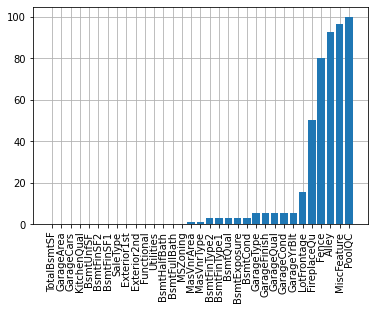

In [ ]:
missing = test.isnull().sum()
missing = missing[missing > 0]/test.shape[0]*100
missing.sort_values(inplace=True)
print("{} features have missing values\n\n{}".format(len(missing), missing))

plt.grid(zorder=0)
plt.bar(missing.index, missing.values, zorder=3)
plt.xticks(rotation='vertical')
plt.show()

19 features have missing values, 4 over 50% of all data

In [ ]:
quantitative = [feature for feature in train.columns.drop(['SalePrice', 'Id']) if train.dtypes[feature] != 'object']
qualitative = [feature for feature in train.columns.drop(['SalePrice', 'Id']) if train.dtypes[feature] == 'object']

print("Train observations: {}\nTest observations: {}\nQuantitative No: {} \
        \nQualitative No: {} \n\nQuantitative features: {} \n\nQualitative features: {}"\
      .format(len(train), len(test), len(quantitative), len(qualitative), quantitative, qualitative))


Train observations: 1460
Test observations: 1459
Quantitative No: 36         
Qualitative No: 43 

Quantitative features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

Qualitative features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Hea

There are 1460 instances of training data and 1459 of test data. Total number of attributes equals 81, of which 36 is numeric + Id and SalePrice, 43 categorical .

In [ ]:
train[quantitative].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [ ]:
train[qualitative].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


As the description file, I got these ordinal features. These features will be encoded by OrdinalEnCoder using sklearn. MSSubClass should be converted to objects(str) to be treated as a categorical feature.

In [ ]:
ordinal_fields = ['MSSubClass', 'ExterQual', 'LotShape', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                    'Functional', 'FireplaceQu', 'KitchenQual', 'GarageFinish',
                    'GarageQual', 'GarageCond', 'Fence', 'LotConfig','LandContour',
                    'MasVnrType', 'Electrical', 'SaleCondition', 'Foundation',
                    'Condition2', 'PavedDrive', 'PoolQC', 'CentralAir', 'LandSlope',
                    'Alley', 'ExterCond', 'MSZoning', 'Condition1',
                    'GarageType']
train[ordinal_fields].head()

,MSSubClass,ExterQual,LotShape,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Functional,FireplaceQu,KitchenQual,GarageFinish,GarageQual,GarageCond,Fence,LotConfig,LandContour,MasVnrType,Electrical,SaleCondition,Foundation,Condition2,PavedDrive,PoolQC,CentralAir,LandSlope,Alley,ExterCond,MSZoning,Condition1,GarageType
0,60,Gd,Reg,Gd,TA,No,GLQ,Unf,Ex,Typ,NaN,Gd,RFn,TA,TA,NaN,Inside,Lvl,BrkFace,SBrkr,Normal,PConc,Norm,Y,NaN,Y,Gtl,NaN,TA,RL,Norm,Attchd
1,20,TA,Reg,Gd,TA,Gd,ALQ,Unf,Ex,Typ,TA,TA,RFn,TA,TA,NaN,FR2,Lvl,None,SBrkr,Normal,CBlock,Norm,Y,NaN,Y,Gtl,NaN,TA,RL,Feedr,Attchd
2,60,Gd,IR1,Gd,TA,Mn,GLQ,Unf,Ex,Typ,TA,Gd,RFn,TA,TA,NaN,Inside,Lvl,BrkFace,SBrkr,Normal,PConc,Norm,Y,NaN,Y,Gtl,NaN,TA,RL,Norm,Attchd
3,70,TA,IR1,TA,Gd,No,ALQ,Unf,Gd,Typ,Gd,Gd,Unf,TA,TA,NaN,Corner,Lvl,None,SBrkr,Abnorml,BrkTil,Norm,Y,NaN,Y,Gtl,NaN,TA,RL,Norm,Detchd
4,60,Gd,IR1,Gd,TA,Av,GLQ,Unf,Ex,Typ,TA,Gd,RFn,TA,TA,NaN,FR2,Lvl,BrkFace,SBrkr,Normal,PConc,Norm,Y,NaN,Y,Gtl,NaN,TA,RL,Norm,Attchd


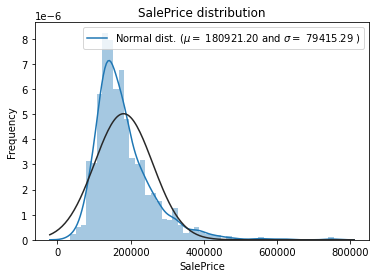

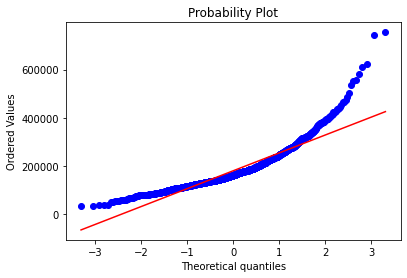

In [ ]:
sns.distplot(train['SalePrice'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])

#plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

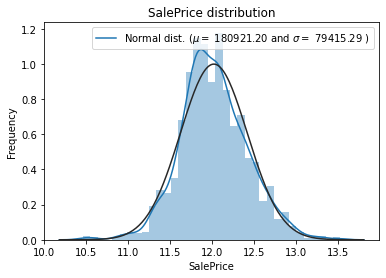

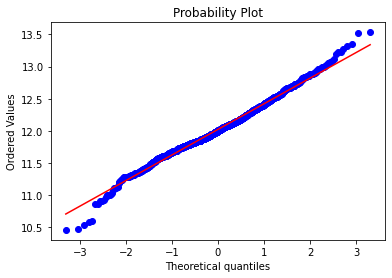

In [ ]:
#plot the distribution
sns.distplot(np.log1p(train['SalePrice']) , fit=norm)

# Get the fitted parameters
(mu, sigma) = norm.fit(train['SalePrice'])


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#the QQ-plot
fig = plt.figure()
stats.probplot(np.log1p(train['SalePrice']), plot=plt)
plt.show()

It is apparent that SalePrice doesn't follow a normal distribution, so before performing regression it has to be transformed. I will use log1p transform to make [better predictions](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html).

In [ ]:
print(not train[quantitative].apply(lambda x: stats.shapiro(x.fillna(0))[1] < 0.05).any())

False


All quantitative features are not normal distribution as well

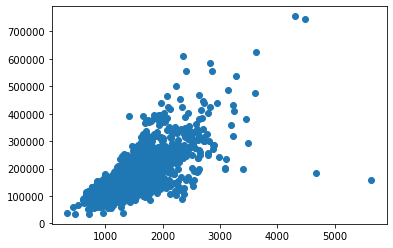

In [ ]:
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.show()

Read the [Acknowledgments](http://jse.amstat.org/v19n3/decock.pdf), some features contain outliers. So I will remove observations that have "GrlivArea" greater than 4500.

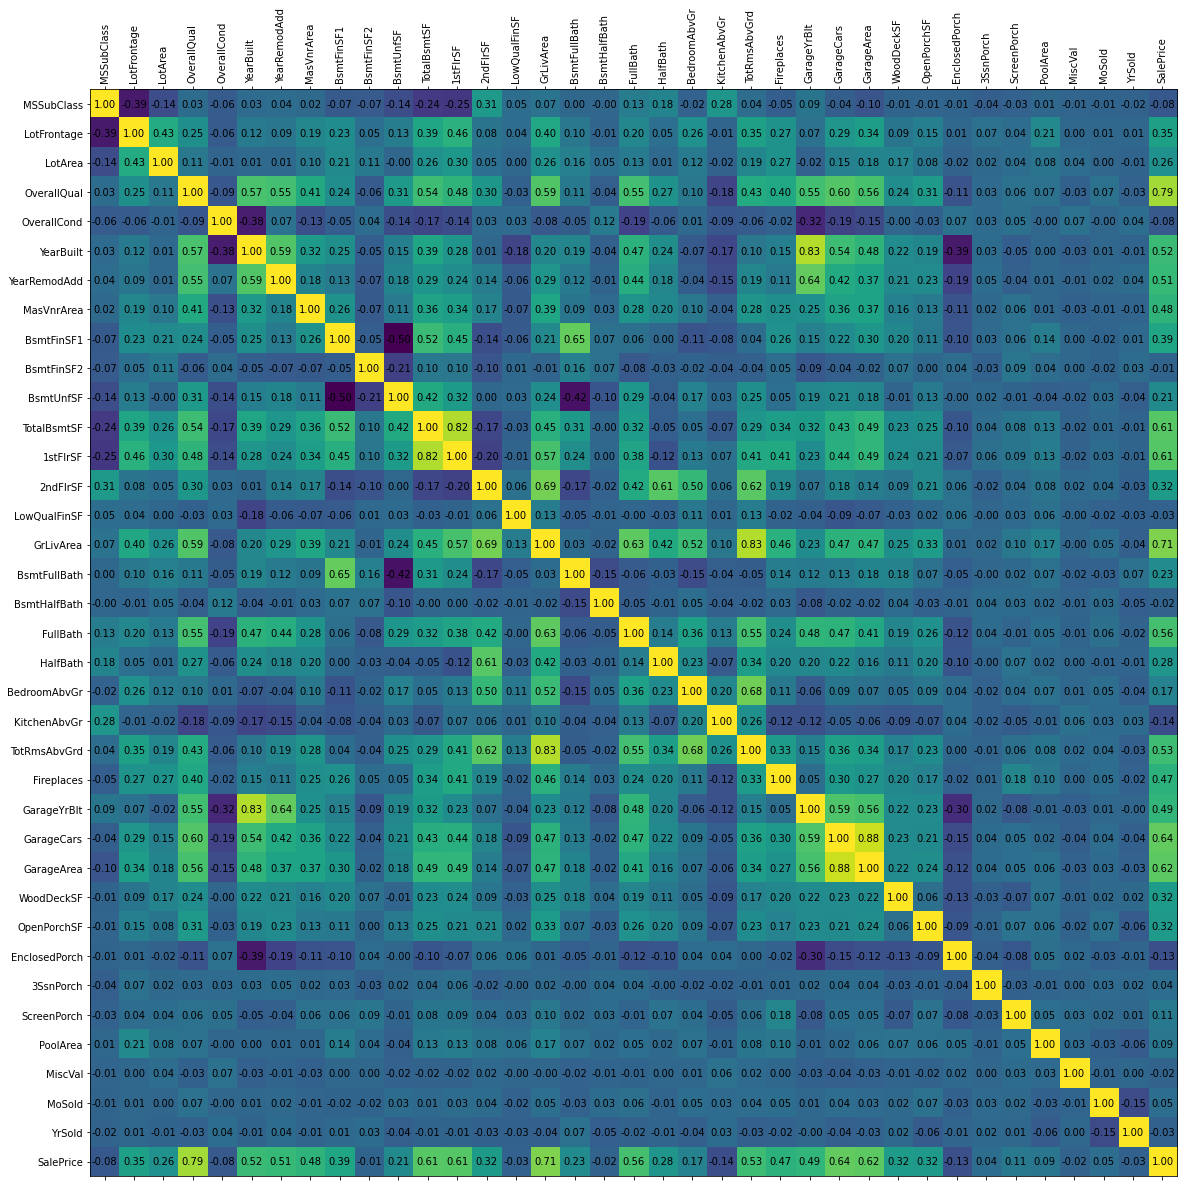

In [ ]:
subdata = train[quantitative + ['SalePrice']]
correlation_matrix = subdata.corr()

fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(correlation_matrix)

# this two lines may cause trouble with different versions of matplotlib. 
# If it fail, try to delete and see.
plt.xticks(np.arange(len(correlation_matrix.columns)))
plt.yticks(np.arange(len(correlation_matrix.columns)))

ax.set_xticklabels(correlation_matrix.columns.values.tolist())
ax.set_yticklabels(correlation_matrix.columns.values.tolist())
plt.xticks(rotation=90)

for i, column in enumerate(correlation_matrix.values):
    for j, value in enumerate(column):
        text = ax.text(j, i, "%.2f" % value,
                       ha="center", va="center", color="black")
plt.show()

# Data Preprocessing



Data preprocessing is needed. It plays important role in  
model accuracy. Some post such as [Data preprocessing](https://machinelearningmastery.com/improve-model-accuracy-with-data-pre-processing/) to improve model accuracy, handling [missing values](https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/) pros and cons, [Some different encoding](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)  to number objective features helped me a lot.


## Helpful Function



In [ ]:
def create_features(df, max_features=1000, drop_contains=[], copy=True):
    """This function generates more features by adding and multiply quantitative
    columns with each other
    
    Parameters
    ----------
    df: train data, pandas data frame.

    max_features: limit number of new features need to be generated.

    drop_contains: drop these features before generating new features.
    
    copy: make a copy of original df dataframe if True

    Returns
    -------
    new features 
    """
    if copy:
        df = df.copy()
    es = ft.EntitySet(id='data')
    es.entity_from_dataframe(entity_id = 'data', dataframe = df, 
                         make_index = True, index = 'index')

    # Run deep feature synthesis with transformation primitives
    feature_matrix, _ = ft.dfs(entityset = es, target_entity = 'data',
                               drop_contains=drop_contains, max_features=max_features,
                            trans_primitives = ['add_numeric', 'multiply_numeric'])
    return feature_matrix

def get_dummies(train_data, test_data, dummies_features, ignore_features=[], create=True):
    """This function combines train_data and test_data and get dummies on 
    dummies_features column. making train and test features consistency.
    
    Parameters
    ----------
    train_data: data of train

    test_data: data of test

    dummies_features: features name to get dummies
    
    ignore_features: features to be ignored in featuretools

    create: boolean value, generate more features if True

    Returns
    -------
    (pandas DataFrame, pandas DataFrame)
    """
    train = train_data.copy()
    test = test_data.copy()
    train_size = len(train)
    df = pd.concat([train, test], ignore_index=True)

    if create:
        drop_features = dummies_features + ignore_features
        df = pd.concat([df[drop_features], 
                        create_features(df, drop_contains=drop_features,
                                        max_features=-1)], axis=1)

    df = pd.concat([df.drop(dummies_features, axis=1), 
                    pd.get_dummies(df[dummies_features])], axis=1)
    

    return (df.iloc[:train_size, :], 
            df.iloc[train_size:, :].reset_index(drop=True))



def preprocess(data_frame, is_train=True, skew_threshold=0.75, grlivarea=4500,
               high_skew_features=[]):
    """This function preprocess removes id feature. Filling 
    category empty values with None and 0 for quantitative features and 
    median for "LotFrontage" which is grouped by "Neighborhood". Encoding 
    category features that exist ordinal category. Dropping outliers on train 
    set and boxcox1 transform high skew feature. Applying log1p to train output.

    
    Parameters
    ----------
    data_frame: pandas dataframe need to process

    is_train: boolean variable, default True if preprocessing train data. 
    Otherwise False
    
    skew_threshold: threshold of skew features, if a feature skewness greater than
    threshold then this feature will be transformed by boxcox1p

    grlivarea: In the competition document has said that contains outlier. 
    this is a threshold to remove outliers in train data with GrLivArea feature. 
    This is only applied on train set

    high_skew_features: list of high skew features need to be removed
                  
    Returns
    -------
    (preprocessed pandas dataframe, objects list, high skew features list)
    """
    df = data_frame.copy()
    df = df.drop(['Id'], axis=1)
    # This makes sure that MSSubClass will be treated like ordinal not numeric type
    df = df.astype({'MSSubClass': 'str'})

    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage']\
                          .transform(lambda x: x.fillna(x.median()))
    # Fill None values for object dtype cells    
    objects = [feature for feature in df.columns if df[feature].dtype==object]
    df.update(df[objects].fillna('None'))
    # Fill 0 values for numeric data type cells
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerics = [feature for feature in df.columns if df[feature].dtype in \
                numeric_dtypes]
    df.update(df[numerics].fillna(0))
    
    ord_en = OrdinalEncoder(categories=orders) 
    df[ordinal_fields] = ord_en.fit_transform(df[ordinal_fields])

    
    if is_train:
        df = df[df['GrLivArea'] < grlivarea]
        # Transform target with log1p
        df["SalePrice"] = np.log1p(df["SalePrice"])
        # Get skewness of features
        skew_features = df[numerics].skew()
        # Filter skewness features which have skewness greater than skew_threshold
        high_skew = skew_features[np.abs(skew_features) > skew_threshold]
        high_skew_features = high_skew.index
        # Get outliers feature by zscore
        outliers = df[(np.abs(stats.zscore(df[numerics])) > 3).all(axis=1)].index
        df = df.drop(outliers)
    
    for i in high_skew_features:
            df[i] = boxcox1p(df[i], 0) # when lambda=0 this is the same as log1p
    
    
    return (df.reset_index(drop=True), objects, high_skew_features)

## Process and Split data

In [ ]:
# https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
ordinal_fields = ['MSSubClass', 'ExterQual', 'LotShape', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                    'Functional', 'FireplaceQu', 'KitchenQual', 'GarageFinish',
                    'GarageQual', 'GarageCond', 'Fence', 'LotConfig','LandContour',
                    'MasVnrType', 'Electrical', 'SaleCondition', 'Foundation',
                    'Condition2', 'PavedDrive', 'PoolQC', 'CentralAir', 'LandSlope',
                    'Alley', 'ExterCond', 'MSZoning', 'Condition1',
                    'GarageType']
      
    
# orders of ordinal fields
orders = [['None', '20', '30', '40', '45', '50', '60', '70', '75', '80', '85',
           '90', '120', '150', '160', '180', '190'],  #MSclass 
          ['None', 'Fa', 'TA', 'Gd', 'Ex'], #ExterQual
          ['None', 'Reg', 'IR1' , 'IR2', 'IR3'], #LotShape 
          ['None', 'Fa', 'TA', 'Gd', 'Ex'], #BsmtQual 
          ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], #BsmtCond  
          ['None', 'No', 'Mn', 'Av', 'Gd'],#BsmtExposure 
          ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ' , 'GLQ' ], #BsmtFinType1 
          ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ' , 'GLQ' ], #BsmtFinType2 
          ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], #HeatingQC 
          ['None', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], #Functional 
          ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],  #FireplaceQu 
          ['None', 'Fa', 'TA', 'Gd', 'Ex'],#KitchenQual  
          ['None', 'Unf', 'RFn', 'Fin'],#GarageFinish 
          ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], #GarageQual 
          ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], #GarageCond 
          ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], # Fence
          ['None', 'FR3', 'FR2', 'CulDSac', 'Corner', 'Inside'], #LotConfig 
          ['None', 'Low', 'HLS', 'Bnk', 'Lvl'], #LandContour 
          ['None', 'Stone', 'BrkFace', 'BrkCmn'], #MasVnrType 
          ['None', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], #Electrical 
          ['None', 'Partial','Family', 'Alloca', 'AdjLand',  'Abnorml', 'Normal'], #SaleCondition 
          ['None', 'Wood', 'Stone', 'Slab', 'BrkTil', 'CBlock', 'PConc'], #Foundation 
          ['None', 'RRAe', 'RRAn',  'RRNn', 'Norm', 'PosA', 'PosN', 'Feedr', 'Artery'], #Condition2 
          ['None', 'N', 'P', 'Y'], #PavedDrive 
          ['None', 'Fa', 'TA', 'Gd', 'Ex'], #PoolQC 
          ['None', 'N', 'Y'], #CentralAir 
          ['None', 'Sev', 'Mod', 'Gtl'], #LandSlope 
          ['None', 'Grvl', 'Pave'], #Alley 
          ['None', 'Po', 'Fa', 'TA', 'Gd',  'Ex'], #ExterCond 
          ['None', 'FV', 'RP', 'A', 'RL',  'RM', 'RH', 'I', 'C (all)'], #MSZoning
          ['None', 'RRAe', 'RRAn',  'RRNe', 'RRNn', 'Norm', 'PosA', 'PosN', 
          'Feedr',  'Artery'], #Condition1 
          ['None',  'CarPort', 'Basment', 'BuiltIn', 'Detchd', 'Attchd', '2Types']] #GarageType

In [ ]:
# processing training data
processed_train, objects, high_skew_features = preprocess(train)
train_data = processed_train.drop('SalePrice', axis=1)
y = processed_train['SalePrice'].values.ravel()
# process testing data
processed_test, _, __= preprocess(test[train.drop('SalePrice', axis=1).columns], 
                            is_train=False, high_skew_features=high_skew_features)
# Get list of dummies features which have no ordinal relationship exist
dummies_features = list(set(objects)-set(ordinal_fields))
train_dum, test_dum = get_dummies(train_data, processed_test, dummies_features,
                                  ignore_features=ordinal_fields)

In [ ]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(
                            train_dum.values, y, test_size=0.3, random_state=42)
X_test = test_dum.values

In [ ]:
print(np.shape(X_train), np.shape(y_train), np.shape(X_val), np.shape(y_val), np.shape(test_dum))

(1020, 1362) (1020,) (438, 1362) (438,) (1459, 1362)


In [ ]:
train_dum.head()

,MSSubClass,ExterQual,LotShape,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Functional,FireplaceQu,KitchenQual,GarageFinish,GarageQual,GarageCond,Fence,LotConfig,LandContour,MasVnrType,Electrical,SaleCondition,Foundation,Condition2,PavedDrive,PoolQC,CentralAir,LandSlope,Alley,ExterCond,MSZoning,Condition1,GarageType,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD
0,6.0,3.0,1.0,3.0,3.0,1.0,6.0,1.0,5.0,7.0,0.0,3.0,2.0,3.0,3.0,0.0,5.0,4.0,2.0,5.0,6.0,6.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,4.0,5.0,5.0,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,2.0,1.0,3.0,3.0,4.0,5.0,1.0,5.0,7.0,3.0,2.0,2.0,3.0,3.0,0.0,2.0,4.0,0.0,5.0,6.0,5.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,4.0,8.0,5.0,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6.0,3.0,2.0,3.0,3.0,2.0,6.0,1.0,5.0,7.0,3.0,3.0,2.0,3.0,3.0,0.0,5.0,4.0,2.0,5.0,6.0,6.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,4.0,5.0,5.0,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7.0,2.0,2.0,2.0,4.0,1.0,5.0,1.0,4.0,7.0,4.0,3.0,1.0,3.0,3.0,0.0,4.0,4.0,0.0,5.0,5.0,4.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,4.0,5.0,4.0,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6.0,3.0,2.0,3.0,3.0,3.0,6.0,1.0,5.0,7.0,3.0,3.0,2.0,3.0,3.0,0.0,2.0,4.0,2.0,5.0,6.0,6.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,4.0,5.0,5.0,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
test_dum.head()

,MSSubClass,ExterQual,LotShape,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Functional,FireplaceQu,KitchenQual,GarageFinish,GarageQual,GarageCond,Fence,LotConfig,LandContour,MasVnrType,Electrical,SaleCondition,Foundation,Condition2,PavedDrive,PoolQC,CentralAir,LandSlope,Alley,ExterCond,MSZoning,Condition1,GarageType,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,RoofStyle_Mansard,RoofStyle_Shed,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD
0,1.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,3.0,7.0,0.0,2.0,1.0,3.0,3.0,3.0,5.0,4.0,0.0,5.0,6.0,5.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,6.0,8.0,5.0,4.394449,9.360741,5,6,1961,1961,0.000000,6.150603,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,2.0,2.0,2.0,3.0,1.0,5.0,1.0,3.0,7.0,0.0,3.0,1.0,3.0,3.0,0.0,4.0,4.0,2.0,5.0,6.0,5.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,4.0,5.0,5.0,4.406719,9.565775,6,6,1958,1958,4.691348,6.828712,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6.0,2.0,2.0,3.0,3.0,1.0,6.0,1.0,4.0,7.0,3.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,0.0,5.0,6.0,6.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,4.0,5.0,5.0,4.317488,9.534668,5,5,1997,1998,0.000000,6.674561,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6.0,2.0,2.0,2.0,3.0,1.0,6.0,1.0,5.0,7.0,4.0,3.0,3.0,3.0,3.0,0.0,5.0,4.0,2.0,5.0,6.0,6.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,4.0,5.0,5.0,4.369448,9.208238,6,6,1998,1998,3.044522,6.401917,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,12.0,3.0,2.0,3.0,3.0,1.0,5.0,1.0,5.0,7.0,0.0,3.0,2.0,3.0,3.0,0.0,5.0,2.0,0.0,5.0,6.0,6.0,4.0,3.0,0.0,2.0,3.0,0.0,3.0,4.0,5.0,5.0,3.784190,8.518392,8,5,1992,1992,0.000000,5.575949,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Modelling

## Base Model

In [ ]:
random_state = 42
cv = 5
# Base models default configuration
ridge = Ridge(random_state=random_state, alpha=1.0, max_iter=None, tol=0.001)
lasso = Lasso(random_state=random_state, alpha=1.0,max_iter=1000, tol=0.0001)
elasticnet = ElasticNet(random_state=random_state, alpha=1.0, l1_ratio=0.5, 
                        max_iter=1000, tol=0.0001)
gbr = GradientBoostingRegressor(random_state=random_state, loss='ls', 
                                learning_rate=0.1, n_estimators=100,  
                                min_samples_split=2, min_samples_leaf=1, 
                                max_depth=3,max_features=None, 
                                alpha=0.9, max_leaf_nodes=None,
                                tol=0.0001)
lgbr = LGBMRegressor(seed=random_state, boosting_type='gbdt', num_leaves=31, max_depth=- 1, 
                     learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, 
                     objective=None, class_weight=None, min_split_gain=0.0, 
                     min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
                     subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, 
                     reg_lambda=0.0,
                     importance_type='split')

xgbr = XGBRegressor(random_state=random_state)

stack_regressor = StackingRegressor(estimators=[('ridge', ridge),('lasso', lasso),
                                                ('elasticnet', elasticnet),
                                                ('lgbr', lgbr), ('xgbr', xgbr)],
                                    final_estimator=gbr,
                                    cv=None)

models = {'ridge':make_pipeline(StandardScaler(), ridge),
          'lasso':make_pipeline(StandardScaler(), lasso),
          'elasticnet':make_pipeline(StandardScaler(), elasticnet),
          'gbr':gbr,
          'lgbr':lgbr,
          'xgbr':xgbr,
          'stack_regressor':stack_regressor
}

# Model Evaluation and Validation

## Metrics

I will choose root mean squared error to evaluate models

In [ ]:
def rmse(y, y_pred):
    """
    Parameters
    ----------
    y: Real output of train
    y_pred: Output of predictions 
    Returns
    -------
    Root mean squred error
    """
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X_train, y=y_train, cv=5):
    """
    Parameters
    ----------
    model: model need to be crossed validation
    X: train input, default is X_train
    y: train ouput, default is y_train
    cv: int
    Returns
    -------
    cross-validation root mean squared error
    """
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error",
                                    cv=cv))
    return (rmse)




def fit_score(models, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, cv=5):
    """This function gets score of model. Fitting model on train and shows 
    some info
    Parameters
    ----------
    models: dictionary of model, default models 
    X_train: train data, default X_train 
    y_train: train ouput, default y_train 
    X_val: validation data, default X_val 
    y_val: target of validation set, default y_val 
    cv: int number of folds, default 5
    Returns
    -------
    models score: dictionary
    """
    model_score = {}
    # for each model
    for name, model in models.items():
        # get cv root mean squared error
        score = cv_rmse(model, cv=cv)
        # fit model with train data
        model.fit(X_train, y_train)
        # update model 
        # models[name] = model
        # storing score mean
        model_score[name] = score.mean()
        print('{} mean {} std {} Train rmse={} Test rmse={}, {}'.format(
            name, score.mean(), score.std(),                                                            
            rmse(y_train, model.predict(X_train)),
            rmse(y_val, model.predict(X_val)), dt.now()))
    return model_score

In [ ]:
score = fit_score(models)

ridge mean 0.1715080826977394 std 0.015712763632988583 Train rmse=0.06880959140781302 Test rmse=0.15501880643018076
lasso mean 0.40084234612081876 std 0.019728337258758364 Train rmse=0.4008879587249929 Test rmse=0.3965675672424952
elasticnet mean 0.40084234612081876 std 0.019728337258758364 Train rmse=0.4008879587249929 Test rmse=0.3965675672424952
gbr mean 0.12485513622115985 std 0.008635980897927557 Train rmse=0.06263803984874429 Test rmse=0.12468581446890267
lgbr mean 0.12786964453558328 std 0.009369726442189105 Train rmse=0.02459961460542538 Test rmse=0.1309006165763363
[22:49:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:49:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:49:17] WARNING: /workspace/src/obj

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.60238e-17): result may not be accurate.
  overwrite_a=False)


[22:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.26347e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.36397e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.2682e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.12481e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.18448e-17): result may not be accurate.
  overwrite_a=False)


[22:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:50:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.4902e-17): result may not be accurate.
  overwrite_a=False)


[22:50:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.27035e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.90965e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.07937e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=3.23882e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.09721e-17): result may not be accurate.
  overwrite_a=False)


[22:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:51:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.3596e-17): result may not be accurate.
  overwrite_a=False)


[22:52:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.19835e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.2529e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.2948e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.21643e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.14951e-17): result may not be accurate.
  overwrite_a=False)


[22:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.42906e-17): result may not be accurate.
  overwrite_a=False)


[22:53:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.21903e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.89951e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.99704e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.05367e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.17253e-17): result may not be accurate.
  overwrite_a=False)


[22:53:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.22883e-17): result may not be accurate.
  overwrite_a=False)


[22:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.17794e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.1237e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.17374e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=3.22198e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.0878e-17): result may not be accurate.
  overwrite_a=False)


[22:55:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.09502e-17): result may not be accurate.
  overwrite_a=False)


[22:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.60238e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.4902e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.3596e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.42906e-17): result may not be accurate.
  overwrite_a=False)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.22883e-17): result may not be accurate.
  overwrite_a=False)


[22:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:56:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:56:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:56:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:56:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
stack_regressor mean 0.12462953237726668 std 0.007425562295380473 Train rmse=0.07573751315614492 Test rmse=0.12480845796891954


## Error Analysis

In [ ]:
# ridge mean 0.1715080826977394 std 0.015712763632988583 Train rmse=0.06880959140781302 Test rmse=0.15501880643018076
# lasso mean 0.40084234612081876 std 0.019728337258758364 Train rmse=0.4008879587249929 Test rmse=0.3965675672424952
# elasticnet mean 0.40084234612081876 std 0.019728337258758364 Train rmse=0.4008879587249929 Test rmse=0.3965675672424952
# gbr mean 0.12485513622115985 std 0.008635980897927557 Train rmse=0.06263803984874429 Test rmse=0.12468581446890267
# lgbr mean 0.12786964453558328 std 0.009369726442189105 Train rmse=0.02459961460542538 Test rmse=0.1309006165763363
# xgbr mean 0.12494059418929786 std 0.008999362462445261 Train rmse=0.07051119675565014 Test rmse=0.1257187779300982
# stack_regressor mean 0.12462953237726668 std 0.007425562295380473 Train rmse=0.07573751315614492 Test rmse=0.12480845796891954

Based on the printed results, Lasso, Ridge, ElasticNet have a large standard deviation -> high variance. It means these models are too complex. So at first, I will use the Lasso model to regularize and reduce my input features then tune my models. To speed up the tuning process, I will use GridSearchCV from Sklearn. Based on the return cv_results_, best_params_ and some of my own functions to tune model params. I will tune one model as an example, with the other are almost the same implementation. If the model has many parameters, We should tune one by one or two by two at a time or use RandomizedSearchCV for time-saving.


## Features Selection

You can find out other features selection method [here](https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection)

In [ ]:
params = {
            'lasso': {
                'alpha':list(np.logspace(-4, 4))
                
            }}


lasso = GridSearchCV(Lasso(random_state=42), param_grid=params['lasso'], 
                    return_train_score=True, scoring='neg_mean_squared_error',
                    cv=5)
lasso_pl = make_pipeline(StandardScaler(), lasso).fit(X_train, y_train)
print(rmse(y_train, lasso_pl.predict(X_train)),  
      rmse(y_val, lasso_pl.predict(X_val)))

0.09429355839892313 0.11694059182159497


In [ ]:
lasso.best_params_

{'alpha': 0.0020235896477251557}

In [ ]:
from sklearn.feature_selection import SelectFromModel

lasso = Lasso(random_state=42, alpha=0.0020235896477251557)
sel = SelectFromModel(lasso, threshold=1e-5).fit(StandardScaler().fit_transform(X_train), y_train)

In [ ]:
features = train_dum.columns[sel.get_support()]

In [ ]:
print(features)

Index(['ExterQual', 'LotShape', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'Functional', 'KitchenQual', 'GarageFinish', 'GarageQual',
       ...
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdng',
       'Exterior2nd_AsbShng', 'Exterior2nd_HdBoard', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Wd Shng', 'MiscFeature_Othr',
       'MiscFeature_TenC'],
      dtype='object', length=135)


In [ ]:
train_data = train_dum[features]
test_data = test_dum[features]
X_train, X_val, y_train, y_val = train_test_split(
                            train_data.values, y, test_size=0.3, random_state=42)
X_test = test_data.values

In [ ]:
X_train.shape

(1020, 135)

In [ ]:
print(np.shape(X_train), np.shape(y_train), np.shape(X_val), np.shape(y_val), np.shape(train_dum), np.shape(X_test))

(1020, 135) (1020,) (438, 135) (438,) (1458, 1362) (1459, 135)


## Tuning Model

I will tune the Ridge model. The other models will be done almost the same. [xgboost hyper parameter tuning](https://www.kaggle.com/felipefiorini/xgboost-hyper-parameter-tuning).
[xgboost tuning notes](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html), [lightgbm tuning](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html)

In [ ]:
params = {
            'ridge': {
                'alpha':list(np.logspace(-3, 3))
                
            }}


ridge = GridSearchCV(Ridge(random_state=42), param_grid=params['ridge'], 
                    return_train_score=True, scoring='neg_mean_squared_error',
                    cv=5)
ridge_pl = make_pipeline(StandardScaler(), ridge).fit(X_train, y_train)

print(rmse(y_train, ridge_pl.predict(X_train)), rmse(y_val, ridge_pl.predict(X_val)))

0.09286382604037485 0.1216411148657369


In [ ]:
ridge.best_params_

{'alpha': 104.81131341546852}

In [ ]:
pd.DataFrame(ridge.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
41,0.002954,0.000069,0.000520,0.000010,104.811,{'alpha': 104.81131341546852},-0.014267,-0.011354,-0.012346,-0.010303,-0.011148,-0.011883,0.001357,1,-0.008180,-0.008366,-0.008359,-0.008692,-0.008538,-0.008427,0.000174
40,0.002922,0.000050,0.000519,0.000008,79.0604,{'alpha': 79.06043210907701},-0.014240,-0.011446,-0.012213,-0.010369,-0.011172,-0.011888,0.001315,2,-0.008042,-0.008220,-0.008219,-0.008536,-0.008392,-0.008282,0.000169
42,0.002907,0.000037,0.000607,0.000162,138.95,{'alpha': 138.9495494373136},-0.014340,-0.011265,-0.012524,-0.010251,-0.011142,-0.011904,0.001417,3,-0.008354,-0.008554,-0.008535,-0.008885,-0.008725,-0.008610,0.000181
39,0.002934,0.000041,0.000519,0.000018,59.6362,{'alpha': 59.636233165946365},-0.014248,-0.011534,-0.012116,-0.010446,-0.011205,-0.011910,0.001288,4,-0.007934,-0.008107,-0.008109,-0.008412,-0.008279,-0.008168,0.000164
38,0.003090,0.000126,0.000539,0.000012,44.9843,{'alpha': 44.98432668969444},-0.014284,-0.011617,-0.012048,-0.010531,-0.011245,-0.011945,0.001271,5,-0.007848,-0.008020,-0.008023,-0.008313,-0.008194,-0.008079,0.000160
43,0.002932,0.000032,0.000552,0.000070,184.207,{'alpha': 184.20699693267164},-0.014470,-0.011189,-0.012757,-0.010222,-0.011160,-0.011960,0.001496,6,-0.008571,-0.008794,-0.008754,-0.009126,-0.008961,-0.008841,0.000189
37,0.002956,0.000065,0.000522,0.000010,33.9322,{'alpha': 33.9322177189533},-0.014341,-0.011693,-0.012003,-0.010623,-0.011286,-0.011989,0.001263,7,-0.007781,-0.007954,-0.007957,-0.008236,-0.008130,-0.008011,0.000157
36,0.003025,0.000073,0.000533,0.000013,25.5955,{'alpha': 25.595479226995334},-0.014415,-0.011762,-0.011976,-0.010721,-0.011328,-0.012040,0.001262,8,-0.007728,-0.007905,-0.007909,-0.008176,-0.008083,-0.007960,0.000156
44,0.002953,0.000054,0.000519,0.000011,244.205,{'alpha': 244.205309454865},-0.014670,-0.011142,-0.013057,-0.010227,-0.011215,-0.012062,0.001595,9,-0.008841,-0.009096,-0.009027,-0.009424,-0.009258,-0.009129,0.000199
35,0.003320,0.000499,0.000549,0.000033,19.307,{'alpha': 19.306977288832496},-0.014501,-0.011825,-0.011963,-0.010821,-0.011367,-0.012095,0.001268,10,-0.007688,-0.007868,-0.007873,-0.008130,-0.008049,-0.007922,0.000155


We can see that the alpha is around 104, so I will narrow down the range to get a better result.

In [ ]:
params = {
            'ridge': {
                'alpha':list(np.linspace(79, 138)),
                'tol': [0.0001, 0.00001,  0.001]
            }}
ridge = GridSearchCV(Ridge(random_state=42), param_grid=params['ridge'], 
                    return_train_score=True, scoring='neg_mean_squared_error',
                    cv=cv)

ridge_pl = make_pipeline(StandardScaler(), ridge).fit(X_train, y_train)
print(rmse(y_train, ridge_pl.predict(X_train)),  
      rmse(y_val, ridge_pl.predict(X_val)))

0.09267935631560836 0.12174441779178502


In [ ]:
ridge.best_params_

{'alpha': 97.06122448979592, 'tol': 0.0001}

In [ ]:
pd.DataFrame(ridge.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
45,0.002907,0.000074,0.000507,0.000050,97.0612,0.0001,"{'alpha': 97.06122448979592, 'tol': 0.0001}",-0.014255,-0.011379,-0.012306,-0.010319,-0.011153,-0.011883,0.001344,1,-0.008139,-0.008323,-0.008317,-0.008646,-0.008494,-0.008384,0.000173
46,0.002812,0.000025,0.000472,0.000013,97.0612,1e-05,"{'alpha': 97.06122448979592, 'tol': 1e-05}",-0.014255,-0.011379,-0.012306,-0.010319,-0.011153,-0.011883,0.001344,1,-0.008139,-0.008323,-0.008317,-0.008646,-0.008494,-0.008384,0.000173
47,0.002771,0.000012,0.000481,0.000021,97.0612,0.001,"{'alpha': 97.06122448979592, 'tol': 0.001}",-0.014255,-0.011379,-0.012306,-0.010319,-0.011153,-0.011883,0.001344,1,-0.008139,-0.008323,-0.008317,-0.008646,-0.008494,-0.008384,0.000173
42,0.002986,0.000161,0.000502,0.000016,95.8571,0.0001,"{'alpha': 95.85714285714286, 'tol': 0.0001}",-0.014254,-0.011383,-0.012299,-0.010322,-0.011154,-0.011883,0.001342,4,-0.008133,-0.008316,-0.008311,-0.008639,-0.008487,-0.008377,0.000172
43,0.002933,0.000100,0.000492,0.000019,95.8571,1e-05,"{'alpha': 95.85714285714286, 'tol': 1e-05}",-0.014254,-0.011383,-0.012299,-0.010322,-0.011154,-0.011883,0.001342,4,-0.008133,-0.008316,-0.008311,-0.008639,-0.008487,-0.008377,0.000172
44,0.002857,0.000037,0.000500,0.000026,95.8571,0.001,"{'alpha': 95.85714285714286, 'tol': 0.001}",-0.014254,-0.011383,-0.012299,-0.010322,-0.011154,-0.011883,0.001342,4,-0.008133,-0.008316,-0.008311,-0.008639,-0.008487,-0.008377,0.000172
48,0.002838,0.000053,0.000520,0.000059,98.2653,0.0001,"{'alpha': 98.26530612244898, 'tol': 0.0001}",-0.014257,-0.011375,-0.012312,-0.010317,-0.011152,-0.011883,0.001346,7,-0.008146,-0.008329,-0.008324,-0.008653,-0.008501,-0.008391,0.000173
50,0.002953,0.000111,0.000510,0.000032,98.2653,0.001,"{'alpha': 98.26530612244898, 'tol': 0.001}",-0.014257,-0.011375,-0.012312,-0.010317,-0.011152,-0.011883,0.001346,7,-0.008146,-0.008329,-0.008324,-0.008653,-0.008501,-0.008391,0.000173
49,0.002804,0.000035,0.000483,0.000028,98.2653,1e-05,"{'alpha': 98.26530612244898, 'tol': 1e-05}",-0.014257,-0.011375,-0.012312,-0.010317,-0.011152,-0.011883,0.001346,7,-0.008146,-0.008329,-0.008324,-0.008653,-0.008501,-0.008391,0.000173
41,0.002954,0.000061,0.000486,0.000015,94.6531,0.001,"{'alpha': 94.65306122448979, 'tol': 0.001}",-0.014252,-0.011387,-0.012293,-0.010325,-0.011155,-0.011883,0.001340,10,-0.008127,-0.008309,-0.008304,-0.008632,-0.008481,-0.008370,0.000172


Repeating these steps, I get the following results.

In [ ]:
random_state = 42
cv = 5
params = {
            'ridge': {
                'alpha':[96], 
                'tol':[1e-4], 
            },
            'lasso': {
                'alpha':[0.0053], 
                'tol':[0.01]
            },
            'elasticnet': {
                'alpha':[0.01], 
                'l1_ratio':[0.037],
                'tol':[0.001]
            }, 
            'gbr': {
                'learning_rate':  [0.01],
                'loss':['huber'],
                'n_estimators': [40000],
                'min_samples_leaf':[1],
                'max_features':['sqrt'],
                'max_leaf_nodes':[5],
                'min_samples_split':[2],
                'min_weight_fraction_leaf':[0.01],
                'min_impurity_decrease':[0.02],
                'max_depth':[4],
                'subsample':[0.2]
            },
            'lgbr':{
                # Control overfitting
                'boosting_type':['gbdt'], 
                'num_leaves':[5], 
                'reg_alpha':[0.054],
                'reg_lambda':[0.098],
                'max_depth':[3],
                'min_split_gain':[0.0],
                'min_gain_to_split':[0.006],
                'min_data_in_leaf':[10],
                'min_sum_hessian_in_leaf':[1],
                'bagging_freq':[1],
                'bagging_fraction':[0.7],
                # accuracy
                'max_bin':[20], # 20 higher -> slower -> overfitting
                'learning_rate': [0.1],
                'n_estimators':[288],
                'subsample_for_bin':[521],
                'objective':['regression'], 
                'min_child_weight':[0.001],
                'min_child_samples':[1],
                'colsample_bytree':[0.5],
                'importance_type':['split'],
            } ,
            'xgbr':{
                # control overfitting
                'max_depth': [3],
                'min_child_weight': [1],
                'gama':[0.1],
                # adding randomness to make training robust to noise
                'subsample': [0.9],
                'colsample_bytree': [0.8],
                'learning_rate': [0.1],
                'num_rounds':[1],
                # regularization
                'reg_lambda':[0.34],
                'reg_alpha':[0],

                'num_leaves':[1],
                'subsample_for_bin':[1],
                'min_split_gain':[0.01],
                'min_child_samples':[1],
                'max_delta_step': [7],
                'n_estimators' : [296],
                'objective': ['reg:squarederror'],
                'booster':['gbtree']
            }
          }
ridge = GridSearchCV(Ridge(random_state=random_state), param_grid=params['ridge'], 
                    return_train_score=True, scoring='neg_mean_squared_error',
                    cv=cv, n_jobs=-1)
ridge_pl = make_pipeline(StandardScaler(), ridge)

lasso = GridSearchCV(Lasso(random_state=random_state), param_grid=params['lasso'], 
                    return_train_score=True, scoring='neg_mean_squared_error',
                    cv=cv, n_jobs=-1)
lasso_pl = make_pipeline(StandardScaler(), lasso)

elasticnet = GridSearchCV(ElasticNet(random_state=random_state), param_grid=params['elasticnet'], 
                    return_train_score=True, scoring='neg_mean_squared_error',
                    cv=cv, n_jobs=-1)
elasticnet_pl = make_pipeline(StandardScaler(), elasticnet)

gbr = GridSearchCV(GradientBoostingRegressor(random_state=random_state), param_grid=params['gbr'], 
                    return_train_score=True, scoring='neg_mean_squared_error',
                    cv=cv, n_jobs=-1)

lgbr = GridSearchCV(LGBMRegressor(seed=random_state),param_grid=params['lgbr'], 
                    return_train_score=True, scoring='neg_mean_squared_error',
                    cv=cv, n_jobs=-1)
                    
xgbr = GridSearchCV(XGBRegressor(random_state=random_state),param_grid=params['xgbr'], 
                    return_train_score=True, scoring='neg_mean_squared_error',
                    cv=cv, n_jobs=-1)
stack_regressor = StackingRegressor(
                            estimators=[
                                        ('ridge_pl', ridge_pl),
                                        ('lasso_pl', lasso_pl),
                                        ('elasticnet_pl', elasticnet_pl),
                                        ('lgbr', lgbr), ('gbr', gbr),
                                        ('xgbr', xgbr)],
                            final_estimator=gbr,
                            cv=None, n_jobs=-1)

models = {
          'ridge_pl':ridge_pl,
          'lasso_pl':lasso_pl,
          'elasticnet_pl':elasticnet_pl,
          'gbr':gbr,
          'lgbr':lgbr,
          'xgbr':xgbr,
          'stack_regressor':stack_regressor
}


In [ ]:
# Base model
# ridge mean 0.1715080826977394 std 0.015712763632988583 Train rmse=0.06880959140781302 Test rmse=0.15501880643018076
# lasso mean 0.40084234612081876 std 0.019728337258758364 Train rmse=0.4008879587249929 Test rmse=0.3965675672424952
# elasticnet mean 0.40084234612081876 std 0.019728337258758364 Train rmse=0.4008879587249929 Test rmse=0.3965675672424952
# gbr mean 0.12485513622115985 std 0.008635980897927557 Train rmse=0.06263803984874429 Test rmse=0.12468581446890267
# lgbr mean 0.12786964453558328 std 0.009369726442189105 Train rmse=0.02459961460542538 Test rmse=0.1309006165763363
# xgbr mean 0.12494059418929786 std 0.008999362462445261 Train rmse=0.07051119675565014 Test rmse=0.1257187779300982
# stack_regressor mean 0.12462953237726668 std 0.007425562295380473 Train rmse=0.07573751315614492 Test rmse=0.12480845796891954
score = fit_score(models, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, cv=cv)

ridge_pl mean 0.1209171419130389 std 0.0077826131013031775 Train rmse=0.09265393575625396 Test rmse=0.12175943044062695, 2020-12-10 02:17:23.537608
lasso_pl mean 0.1230347455402038 std 0.010819646823329308 Train rmse=0.1038535988712564 Test rmse=0.11415628210034776, 2020-12-10 02:17:26.619148
elasticnet_pl mean 0.125910581427014 std 0.0062161986026301646 Train rmse=0.09082323295820799 Test rmse=0.12276114746523076, 2020-12-10 02:17:39.994436
gbr mean 0.11903116969581615 std 0.010927695688907807 Train rmse=0.07410350547934227 Test rmse=0.11253913945437777, 2020-12-10 02:42:48.000855
lgbr mean 0.12451210353124323 std 0.009365326260675603 Train rmse=0.07151702094914804 Test rmse=0.120970296129393, 2020-12-10 02:43:04.764045
xgbr mean 0.12515750536645318 std 0.009852893992385255 Train rmse=0.04510551112939882 Test rmse=0.1186128772564741, 2020-12-10 02:47:43.151282
stack_regressor mean 0.12094659683320153 std 0.006661117626276631 Train rmse=0.07867264575383563 Test rmse=0.11789197056937056

## Model Improvement

I will use score return from fit_score() function to weighted combined models

In [ ]:
score

{'elasticnet_pl': 0.125910581427014,
 'gbr': 0.11903116969581615,
 'lasso_pl': 0.1230347455402038,
 'lgbr': 0.12451210353124323,
 'ridge_pl': 0.1209171419130389,
 'stack_regressor': 0.12094659683320153,
 'xgbr': 0.12515750536645318}

In [ ]:
score.values()

dict_values([0.1209171419130389, 0.1230347455402038, 0.125910581427014, 0.11903116969581615, 0.12451210353124323, 0.12515750536645318, 0.12094659683320153])

Smaller error should have bigger weighted so I will invert these score and scale them to 0-1 scale

In [ ]:
inverted = [1 - x for x in score.values()]
weighted_idx = [x/sum(inverted) for x in inverted]

In [ ]:
weighted_idx

[0.14316167533823623,
 0.14281681628407725,
 0.14234847649134197,
 0.1434688124184047,
 0.14257622343992624,
 0.14247111752511396,
 0.14315687850289968]

In [ ]:
def predict(X):
    return  (0.14316167533823623*models['ridge_pl'].predict(X))+ \
            (0.14281681628407725*models['lasso_pl'].predict(X))+ \
            (0.14234847649134197*models['elasticnet_pl'].predict(X))+ \
            (0.1434688124184047*models['gbr'].predict(X))+ \
            (0.14257622343992624*models['lgbr'].predict(X))+ \
            (0.14247111752511396*models['xgbr'].predict(X))+ \
            (0.14315687850289968*models['stack_regressor'].predict(X))

In [ ]:
rmse(y_val, predict(X_val))

0.11105865071104902

Fitting these models with full data for predictions on test data to submit to kaggle

In [ ]:
for name, model in models.items():
    model.fit(train_data.values, y)

In [ ]:
submission = pd.read_csv("/content/drive/My Drive/funix/machine-learning/asmnt/MLP305/MLP305x_Full_Project_anhlvse00534x@funix.edu.vn/Capstone project/data/sample_submission.csv")
submission.iloc[:,1] = np.expm1(predict(X_test))
submission.to_csv("/content/drive/My Drive/funix/machine-learning/asmnt/MLP305/MLP305x_Full_Project_anhlvse00534x@funix.edu.vn/Capstone project/data/submission_last.csv", index=False)

In [ ]:
submission.head()

,Id,SalePrice
0,1461,118535.964779
1,1462,153926.184966
2,1463,183285.273654
3,1464,193443.931577
4,1465,194315.714169


# Conclusion

## Reflection

After this project, I have learned a lot of interesting things. Getting more experience such as preprocessing data, encoding, transforming data: high skew features, target which is make model more accurate.
Training many models at the same time and combines them to get better predictions. Digging into tunning models that consums a lot of time. I still wonder how other competees get score approximate 0,0000.

## Model improvement solution

Solutions alway still there. As I have learned that I could use K-NN algorithm to find k neighbor that near to input values then get their mean to get the result. Combining those predictions with my current model to get better results. 